# Importing library

In [1]:
import pandas as pd
import numpy as np
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 4.7 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gensim
! pip install glove-python-binary
from glove import Corpus, Glove


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# read jews dataset

In [7]:
df=pd.read_csv('/content/jews.csv')
df.head()

,cl1,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT
0,0,2021-01-01 14:01:02,Prime Minister Benjamin Netanyahu and Health M...,0.145978,0.012841,0.125456,0.103634,0.104054,0.046527
1,1,2021-01-03 16:00:17,Albert Einstein's work in civil rights is ofte...,0.072914,0.002527,0.073019,0.059791,0.008163,0.012105
2,2,2021-01-04 9:24:03,"In The New York Times Opinion Section ""I’m not...",0.146875,0.006123,0.130355,0.048759,0.021488,0.030992
3,3,2021-01-06 0:45:32,A couple was kicked off a flight to Israel aft...,0.273598,0.015933,0.373777,0.157407,0.108910,0.307969
4,4,2021-01-10 19:38:57,Anti-Trump Hollywood star Arnold Schwarzenegge...,0.280214,0.013436,0.298063,0.318118,0.035022,0.048236


In [6]:
df.shape

(321, 9)

# data preprocessing

In [9]:
#cleaning the texts
import re
corpus=[]
max=0
for i in range(len(df)):
    review=re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    corpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


429


In [10]:
corpus

[['prime',
  'minister',
  'benjamin',
  'netanyahu',
  'health',
  'minister',
  'yuli',
  'edelstein',
  'met',
  'afternoon',
  'anti',
  'coronavirus',
  'vaccination',
  'facility',
  'umm',
  'al',
  'fahm',
  '1',
  '000',
  '000th',
  'person',
  'israel',
  'vaccinated',
  'also',
  'participating',
  'visit',
  'umm',
  'al',
  'fahm',
  'mayor',
  'samir',
  'sobhi',
  'mahameed',
  'clalit',
  'healthcare',
  'services',
  'chairman',
  'harel',
  'locker',
  'maccabi',
  'healthcare',
  'services',
  'chairman',
  'ran',
  'saar',
  'official',
  'responsible',
  'coronavirus',
  'affairs',
  'arab',
  'sector',
  'ayman',
  'saif',
  'jabarin',
  'muhammad',
  '66',
  'resident',
  'umm',
  'al',
  'fahm',
  '1',
  '000',
  '000th',
  'person',
  'israel',
  'vaccinated',
  'prime',
  'minister',
  'netanyahu',
  'excitement',
  'jabarin',
  '1',
  '000',
  '000th',
  'person',
  'state',
  'israel',
  'vaccinated',
  'breaking',
  'records',
  'brought',
  'millions',
  

# applying word2vec

In [11]:
! pip install glove-python-binary
from glove import Corpus, Glove

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 4.7 MB/s 
     |████████████████████████████████| 23.9 MB 67.1 MB/s 
     |████████████████████████████████| 965 kB 55.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [13]:
!pip install -U bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import gensim

In [15]:
model=gensim.models.Word2Vec(min_count=3,size=50,workers=4,window=5)
model.build_vocab(corpus,progress_per=100)
model.train(corpus,total_examples=model.corpus_count,epochs=10)
words=list(model.wv.index2word)
print(words)

['jews', 'israel', 'jewish', 'people', 'anti', 'jerusalem', 'one', 'holocaust', 'said', 'state', 'israeli', 'would', 'minister', 'world', 'also', 'us', 'new', 'country', 'orthodox', 'attacks', 'violence', 'arab', 'u', 'many', 'today', 'say', 'day', 'vaccinated', 'like', 'palestinian', 'million', 'american', 'media', 'arabs', 'religious', 'citizens', 'war', 'prime', 'ultra', 'hamas', 'time', 'must', 'https', 'president', 'social', 'police', 'nazi', 'group', 'years', 'every', 'white', 'two', 'semitic', 'security', 'first', 'law', 'city', 'netanyahu', 'coronavirus', 'york', 'semitism', 'nazis', 'killed', 'house', 'hate', 'thousands', 'want', 'part', 'cities', 'united', 'never', 'back', 'six', 'order', 'continue', 'go', 'writes', 'carano', 'violent', 'recent', 'benjamin', 'take', 'came', 'trump', 'palestinians', 'biden', 'crimes', 'well', 'political', 'gina', 'post', 'states', 'hitler', 'pro', 'lives', 'make', 'allow', 'times', 'capitol', 'week', 'says', 'way', 'person', 'vaccines', 'toget

# showing most similar word

In [16]:
model.wv.most_similar('zionism')


[('never', 0.9736835956573486),
 ('new', 0.9736803770065308),
 ('says', 0.9736633896827698),
 ('united', 0.9735202193260193),
 ('two', 0.9734047651290894),
 ('hitler', 0.9733638167381287),
 ('defense', 0.9729663729667664),
 ('religious', 0.9728490114212036),
 ('us', 0.9725591540336609),
 ('countries', 0.9724882245063782)]

# Some other word similarities
## For jews
#### [('people', 0.9994171261787415),
#### ('israel', 0.9993728399276733),
#### ('one', 0.9993185997009277),
#### ('israeli', 0.9992408156394958),
#### ('would', 0.9991591572761536),
#### ('arab', 0.9991288781166077),
#### ('jewish', 0.9990680813789368),
#### ('jerusalem', 0.9990419745445251),
#### ('arabs', 0.9989789128303528),
#### ('police', 0.9989629983901978)]
 ## for Jewish
#### [('one', 0.9991118907928467),
#### ('jerusalem', 0.9991000294685364),
#### ('jews', 0.9990680813789368),
#### ('said', 0.9989429116249084),
#### ('israel', 0.9989162087440491),
#### ('many', 0.9987989664077759),
#### ('arabs', 0.998758852481842),
#### ('would', 0.9987114667892456),
#### ('police', 0.9986500144004822),
#### ('people', 0.9986392855644226)]
 ## for israel
#### [('jews', 0.9993727803230286),
#### ('one', 0.9993022680282593),
#### ('people', 0.9990707635879517),
####('arab', 0.9990444779396057),
#### ('jewish', 0.9989161491394043),
#### ('jerusalem', 0.9989048838615417),
#### ('anti', 0.9989034533500671),
#### ('israeli', 0.9988031983375549),
#### ('police', 0.9988008737564087),
#### ('many', 0.9987764358520508)]

## for israeli
#### [('jews', 0.9992408156394958),
#### ('one', 0.9989809393882751),
#### ('israel', 0.9988033175468445),
#### ('people', 0.9987189769744873),
#### ('jerusalem', 0.9985878467559814),
#### ('us', 0.9985693097114563),
#### ('palestinian', 0.9985672235488892),
#### ('war', 0.9985345602035522),
#### ('arab', 0.9985320568084717),
#### ('many', 0.9985307455062866)]

In [17]:
#word cloud for jews dataset
import re
wordcloudcorpus=[]
max=0
for i in range(len(df)):
    review=re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    review=' '.join(review)
    wordcloudcorpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)

3164


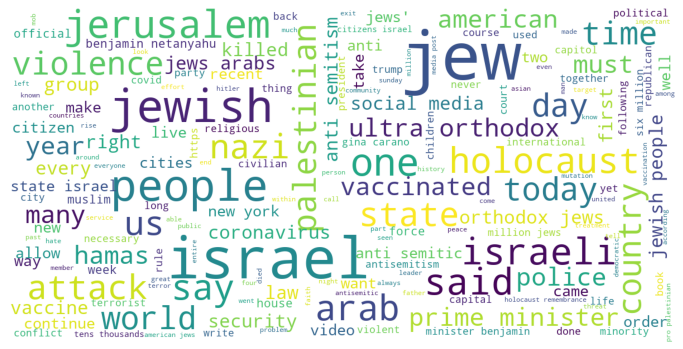

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(wordcloudcorpus)

In [20]:
import json
import pandas as pd
from time import time
import re
from tqdm import tqdm

import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
# To train word2vec
from gensim.models import Word2Vec
# To load pre trained word2vec
from gensim.models import KeyedVectors
# To read glove word embedding
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


# To find word frequency (Term frequency)
from collections import defaultdict

In [21]:

def tsne_plot(for_word, w2v_model):
    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)


    sim_words = w2v_model.wv.most_similar(for_word, topn=10)


    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


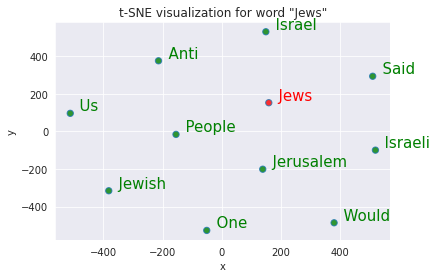

In [22]:
# tsne plot for top 10 similar word to 'jews'
tsne_plot(for_word='jews', w2v_model=model)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


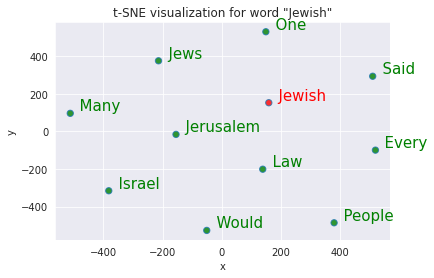

In [23]:
tsne_plot(for_word='jewish', w2v_model=model)

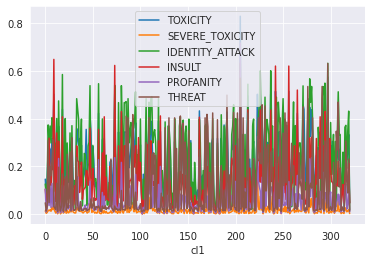

In [24]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/jews.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

# Mention of the terms "jews" and "jewish" in jews dataset

In [25]:
#counting the number of Jews word
corpus=[]
c=0
word="Jews"
word2="jews"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus.append(sum)
    else:
      corpus.append(0)


In [26]:
#counting the number of jewish word
corpus2=[]
c=0
word="Jewish"
word2="jewish"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus2.append(sum)
    else:
      corpus2.append(0)


In [27]:
df["count_jews"]=corpus
df["count_jewish"]=corpus2
#df.head(20)

In [28]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jews"],
                    mode='lines+markers',name="Jews"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_jewish"],
                    mode='lines+markers',name="jewish",))
fig.update_layout(title="Mentions of the terms “Jews” and “jewish”",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [29]:
from plotly import tools      
from plotly.graph_objs import *

In [31]:
import matplotlib.pyplot as plt

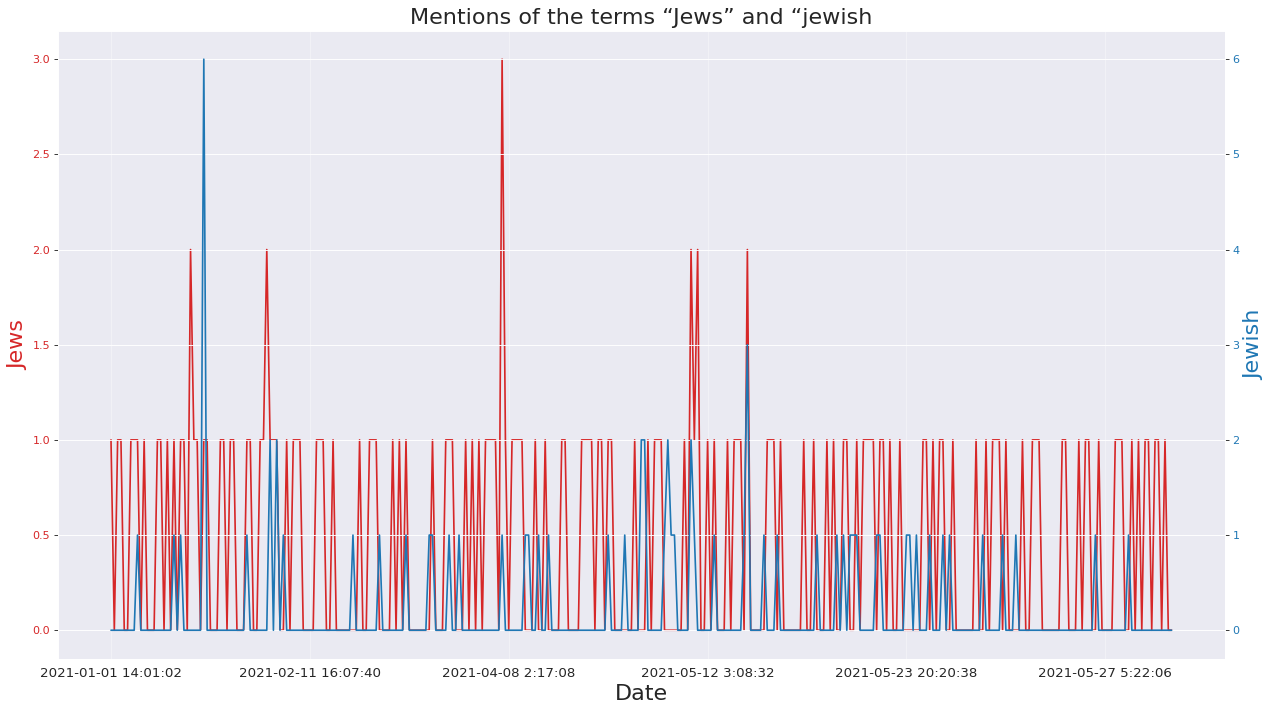

In [30]:
# Import Data
x = df['date']
y1 = df['count_jews']
y2 = df['count_jewish']
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Jews', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Jewish", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Mentions of the terms “Jews” and “jewish", fontsize=20)
fig.tight_layout()
plt.show()

# Mentions of Xenophobic racial slurs in Jews dataset

In [32]:
#counting the number of antisemitism word
antisemitism=[]
c=0
word="antisemitism"
word2="Antisemitism"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      antisemitism.append(sum)
    else:
      antisemitism.append(0)
      

In [33]:
#counting the number of antisemitic word
antisemitic=[]
c=0
word="antisemitic"
word2="Antisemitic"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      antisemitic.append(sum)
    else:
      antisemitic.append(0)

In [34]:
#counting the number of zionists word
zionists=[]
c=0
word="zionists"
word2="Zionists"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      zionists.append(sum)
    else:
      zionists.append(0)

In [35]:
#counting the number of supremacist word
supremacist=[]
c=0
word="supremacist"
word2="Supremacist"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      supremacist.append(sum)
    else:
      supremacist.append(0)

In [36]:
#counting the number of islamophobia word
islamophobia=[]
c=0
word="islamophobia"
word2="Islamophobia"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      islamophobia.append(sum)
    else:
      islamophobia.append(0)

In [37]:
#counting the number of extremists word
extremists=[]
c=0
word="extremists"
word2="Extremists"
for i in range(len(df)):
    review = df['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      extremists.append(sum)
    else:
      extremists.append(0)

In [38]:
df["count_ extremists"]= extremists
df["count_ islamophobia"]= islamophobia
df["count_zionists"]=zionists
df["count_supremacist"]=supremacist
df["count_antisemitic"]=antisemitic
df["count_ antisemitism"]= antisemitism
df.head(20)

,cl1,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT,count_jews,count_jewish,count_ extremists,count_ islamophobia,count_zionists,count_supremacist,count_antisemitic,count_ antisemitism
0,0,2021-01-01 14:01:02,Prime Minister Benjamin Netanyahu and Health M...,0.145978,0.012841,0.125456,0.103634,0.104054,0.046527,1,0,0,0,0,0,0,0
1,1,2021-01-03 16:00:17,Albert Einstein's work in civil rights is ofte...,0.072914,0.002527,0.073019,0.059791,0.008163,0.012105,0,0,0,0,0,0,0,0
2,2,2021-01-04 9:24:03,"In The New York Times Opinion Section ""I’m not...",0.146875,0.006123,0.130355,0.048759,0.021488,0.030992,1,0,0,0,0,0,0,0
3,3,2021-01-06 0:45:32,A couple was kicked off a flight to Israel aft...,0.273598,0.015933,0.373777,0.157407,0.108910,0.307969,1,0,0,0,0,0,0,0
4,4,2021-01-10 19:38:57,Anti-Trump Hollywood star Arnold Schwarzenegge...,0.280214,0.013436,0.298063,0.318118,0.035022,0.048236,0,0,0,0,0,0,0,0
5,5,2021-01-10 16:15:07,Arnold Schwarzenegger posted an impassioned ad...,0.271282,0.017240,0.369346,0.163140,0.118203,0.200061,0,0,0,0,0,0,0,0
6,6,2021-01-11 19:02:26,Arnold Schwarzenegger compares attack on the C...,0.199361,0.011236,0.298063,0.119424,0.026929,0.160474,1,0,0,0,0,0,0,0
7,7,2021-01-11 12:50:17,Hollywood actor and former California governor...,0.316505,0.029892,0.404202,0.211880,0.127995,0.225305,1,0,0,0,0,0,0,0
8,8,2021-01-11 10:00:08,"""It was a night of rampage against the Jews ca...",0.288504,0.017597,0.394145,0.186257,0.029720,0.312296,1,1,0,0,0,0,0,0
9,9,2021-01-11 1:32:04,“'President Trump is a failed leader. He will ...,0.502328,0.030172,0.093382,0.648984,0.091915,0.031435,0,0,0,0,0,0,0,0


In [39]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ extremists"],
                    mode='lines+markers',name="extremists"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ islamophobia"],
                    mode='lines+markers',name="islamophobia"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_zionists"],
                    mode='lines+markers',name="zionists",))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_supremacist"],
                    mode='lines+markers',name="supremacist"))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_antisemitic"],
                    mode='lines+markers',name="antisemitic",))
fig.add_trace(go.Scatter(x=df["date"], y=df["count_ antisemitism"],
                    mode='lines+markers',name="antisemitism"))

fig.update_layout(title="Mentions of Xenophobic slurs in jews dataset",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# Chinese Dataset

In [40]:
df2=pd.read_csv('/content/chinese.csv')
df2.head()

,cl1,Unnamed: 0,date,message,TOXICITY,SEVERE_TOXICITY,IDENTITY_ATTACK,INSULT,PROFANITY,THREAT
0,0,0,2021-01-01 22:00:06,He didn't mince words.,0.052936,0.001642,0.016393,0.062043,0.012139,0.012974
1,1,1,2021-01-01 21:54:14,Three Chinese companies will be booted off the...,0.021241,0.001345,0.027191,0.017376,0.006279,0.024191
2,2,2,2021-01-01 19:28:01,After an executive order signed by President T...,0.049556,0.002333,0.027507,0.034752,0.010395,0.072161
3,3,3,2021-01-01 18:30:50,The New York Stock Exchange announced late on ...,0.017701,0.000966,0.026243,0.011804,0.007290,0.014618
4,4,4,2021-01-01 17:00:01,Will this hurt his chances of winning?,0.062925,0.002987,0.016235,0.033578,0.017999,0.040830


In [41]:
df2.shape

(3286, 10)

# Text preprocessing

In [42]:
#cleaning the texts
import re
chinese=[]
max=0
for i in range(len(df2)):
    review=re.sub('[^a-zA-Z0-9]',' ',df2['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    #ps = PorterStemmer()
    #review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review=str(review)
    #review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    #review=str(review)
    #review=review.split()
    #review=' '.join(review)
    #li = list(review.split(" "))
    #corpus.append(li)
    chinese.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


539


# Applying word2vec

In [43]:
model=gensim.models.Word2Vec(min_count=3,size=50,workers=4,window=5)
model.build_vocab(chinese,progress_per=100)
model.train(chinese,total_examples=model.corpus_count,epochs=10)
words=list(model.wv.index2word)
print(words)

['chinese', 'china', 'u', 'said', 'biden', 'president', 'new', 'government', 'covid', 'https', 'coronavirus', '19', 'year', 'beijing', 'state', 'first', 'officials', 'media', 'world', 'communist', 'one', 'people', 'two', 'country', 'would', 'foreign', 'party', 'trump', 'administration', 'hong', 'says', 'joe', 'companies', 'kong', 'could', 'american', 'us', 'taiwan', 'company', 'pandemic', 'vaccine', 'military', 'united', 'group', 'countries', 'city', 'human', 'states', 'last', 'health', 'reut', 'rs', 'rights', 'xi', 'since', 'social', 'three', 'global', 'wuhan', 'friday', 'week', 'security', 'xinjiang', '000', 'say', 'days', 'back', 'years', 'asian', 'rocket', 'top', 'time', 'like', 'virus', 'origins', 'day', 'including', 'made', 'former', 'report', 'called', 'news', 'tech', 'public', 'also', 'national', 'may', 'long', 'data', 'international', 'according', 'vaccines', 'billion', 'high', 'told', 'team', 'use', 'thursday', 'many', 'organization', 'firm', 'americans', 'jinping', 'york', '

# showing most similar word

In [45]:
model.wv.most_similar('chinese')

[('government', 0.9898541569709778),
 ('ccp', 0.983586311340332),
 ('propaganda', 0.9818253517150879),
 ('outlets', 0.981631875038147),
 ('newspaper', 0.9815880060195923),
 ('organizations', 0.9802515506744385),
 ('admits', 0.9799388647079468),
 ('ruling', 0.9793672561645508),
 ('blackburn', 0.9780306816101074),
 ('regime', 0.9775208234786987)]

#word cloud

In [47]:
#word cloud corpus for chinese dataset
import re
wordcloudcorpus2=[]
max=0
for i in range(len(df2)):
    review=re.sub('[^a-zA-Z0-9]',' ',df2['message'][i])
    review=review.lower()
    review=str(review)
    review=review.split()
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if not w.lower() in stop_words]
    review=' '.join(review)
    wordcloudcorpus2.append(review)
    if(max<len(review)):
      max=len(review)
print(max)

4067


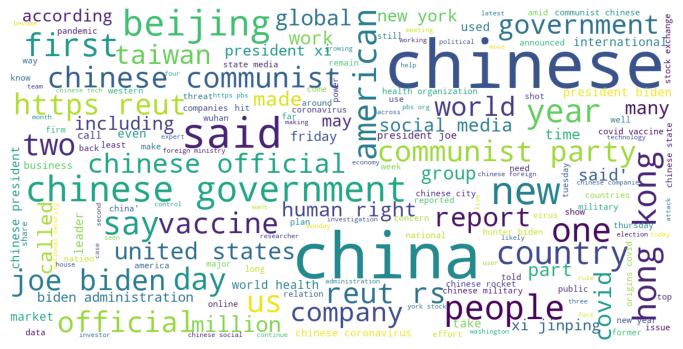

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(wordcloudcorpus2)


In [49]:
import json
import pandas as pd
from time import time
import re
from tqdm import tqdm

import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

# To extract n-gram from text
from gensim.models.phrases import Phrases, Phraser
# To train word2vec
from gensim.models import Word2Vec
# To load pre trained word2vec
from gensim.models import KeyedVectors
# To read glove word embedding
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt


from collections import defaultdict

In [50]:

def tsne_plot(for_word, w2v_model):

    dim_size = w2v_model.wv.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']


    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)


    sim_words = w2v_model.wv.most_similar(for_word, topn=10)


    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



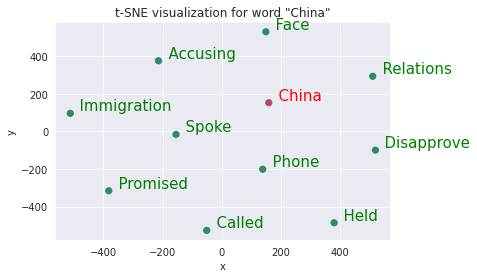

In [51]:
tsne_plot(for_word='china', w2v_model=model)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



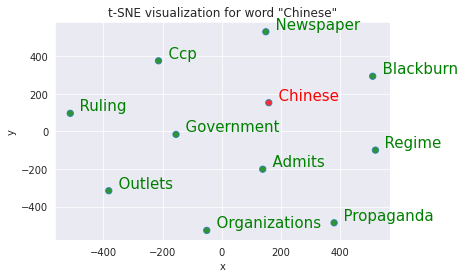

In [52]:
tsne_plot(for_word='chinese', w2v_model=model)

# Mention of the terms "china" and "chinese" in jews dataset

In [53]:
#counting the number of china word
china=[]
c=0
word="china"
word2="China"
for i in range(len(df2)):
    review = df2['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      china.append(sum)
    else:
      china.append(0)


In [54]:
#counting the number of Chinese word
chinese=[]
c=0
word="chinese"
word2="Chinese"
for i in range(len(df2)):
    review = df2['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      chinese.append(sum)
    else:
      chinese.append(0)


In [55]:
df2["count_china"]=china
df2["count_chinese"]=chinese


In [56]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=df2["date"], y=df2["count_china"],
                    mode='lines+markers',name="china"))
fig.add_trace(go.Scatter(x=df2["date"], y=df2["count_chinese"],
                    mode='lines+markers',name="chinese",))
fig.update_layout(title="Mentions of the terms “china” and “chinese”",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

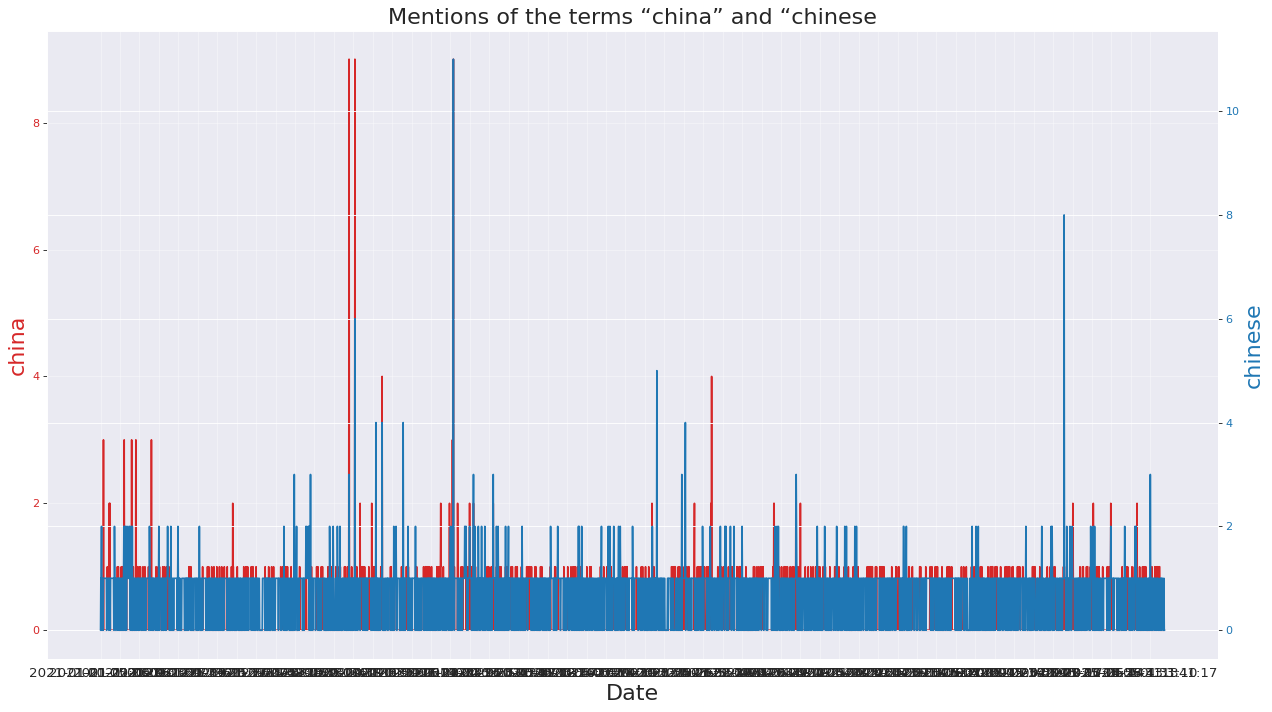

In [57]:
x = df2['date']
y1 = df2['count_china']
y2 = df2['count_chinese']
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx() 
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('china', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("chinese", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Mentions of the terms “china” and “chinese", fontsize=20)
fig.tight_layout()
plt.show()

# Mentions of Xenophobic slurs in chinese dataset

In [58]:
#counting the number of terrorism word
terrorism=[]
c=0
word="terrorism"
word2="Terrorism"
for i in range(len(df2)):
    review = df2['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      terrorism.append(sum)
    else:
      terrorism.append(0)


In [59]:
#counting the number of racist word
racist=[]
c=0
word="Racist"
word2="racist"
for i in range(len(df2)):
    review = df2['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      racist.append(sum)
    else:
      racist.append(0)

In [60]:
#counting the number of totalitarian word
totalitarian=[]
c=0
word="Totalitarian"
word2="totalitarian"
for i in range(len(df2)):
    review = df2['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      totalitarian.append(sum)
    else:
      totalitarian.append(0)

In [61]:
df2["count_totalitarian"]=totalitarian
df2["count_racist"]=racist
df2["count_terrorism"]=terrorism


In [62]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=df2["date"], y=df2["count_totalitarian"],
                    mode='lines+markers',name="totalitarian"))
fig.add_trace(go.Scatter(x=df2["date"], y=df2["count_racist"],
                    mode='lines+markers',name="racist"))
fig.add_trace(go.Scatter(x=df2["date"], y=df2["count_terrorism"],
                    mode='lines+markers',name="terrorism",))
fig.update_layout(title="Mentions of Xenophobic slurs in chinese dataset”",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#combination of two dataset 

In [63]:
jdf=pd.read_csv('/content/joined_df.csv')

# Mentions of the terms “Jews”, “jewish”, “china” and “chinese” in combined dataset

In [64]:
#counting the number of Jews word
corpus=[]
c=0
word="Jews"
word2="jews"
for i in range(len(jdf)):
    review = jdf['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus.append(sum)
    else:
      corpus.append(0)

In [65]:
#counting the number of jewish word
corpus2=[]
c=0
word="Jewish"
word2="jewish"
for i in range(len(jdf)):
    review = jdf['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      corpus2.append(sum)
    else:
      corpus2.append(0)

In [66]:
#counting the number of china word
china=[]
c=0
word="china"
word2="China"
for i in range(len(jdf)):
    review = jdf['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      china.append(sum)
    else:
      china.append(0)

In [67]:
#counting the number of Chinese word
chinese=[]
c=0
word="chinese"
word2="Chinese"
for i in range(len(jdf)):
    review = jdf['message'][i]
    if word or word2 in review:
      c=review.split().count(word)
      d=review.split().count(word2)
      sum=c+d
      chinese.append(sum)
    else:
      chinese.append(0)

In [68]:
jdf["count_jews"]=corpus
jdf["count_jewish"]=corpus2
jdf["count_china"]=china
jdf["count_chinese"]=chinese

In [69]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=jdf["date"], y=jdf["count_china"],
                    mode='lines+markers',name="china"))
fig.add_trace(go.Scatter(x=jdf["date"], y=jdf["count_chinese"],
                    mode='lines+markers',name="chinese",))
fig.add_trace(go.Scatter(x=jdf["date"], y=jdf["count_jews"],
                    mode='lines+markers',name="Jews"))
fig.add_trace(go.Scatter(x=jdf["date"], y=jdf["count_jewish"],
                    mode='lines+markers',name="jewish",))
fig.update_layout(title="Mentions of the terms “Jews”, “jewish”, “china” and “chinese” in full dataset",
                 xaxis_title="Date",yaxis_title="Number of daily occurrences",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()